# Capstone Project - Classifying Authentic and Replica Sneakers: Book 3

Done by: Kenny Lim, GA-DSI15

## Problem Statement

The sneaker resale market is an estimated 2 billion USD in secondary market in 2019. Estimated to be USD6 billion by 2025 according to research firm, Cowen & Co. Due to the lucrative nature of these commodities, there is the inevitable rise of counterfeits. The counterfeit sneakers sales was USD520 billion or 3.3% in global trade in 2018 and it is costing us in various ways. 

The costs to the brands include: 
1. Undercutting sales from the brands. Online counterfeit sales are responsible for approximately USD30.3 billion in annual losses to luxury brands, according to data service firm ResearchAndMarkets’ Global Brand Counterfeiting Report. 
2. Brands have to deal with the backlash from customers who have had bad experiences from fakes. Additional resources have to be allocated to deal with this
3. Reputation damage

Costs to countries:
1. US Customs and Border Protection (CBP) official stated: "However, these items often fund national and transnational criminal organizations, and cost taxpayers billions. " (Oct 2019)

Costs to collectors: 
1. We just want real sneakers man

In light of this, we want to be able to differentiate real and fake sneakers. Our task is to build a classifier that is able to differentiate between real and fake sneakers. Our primary audience will be the sneaker brands and the CBP. 

To do so, we will first be scrapping data from reddit and imgur. We will then ve using a classification model such as CNN to diffentiate between the authentic and the replicas. We will measure our success using several classification metrics including accuracy, F1 and ROCAUC. 

With this, we also hope to help buyers inform themselves and to stay away from counterfeits. Empowering the public with information, they will be able to make the right decision which could help to reduce the lucrative nature of fake sneakers. 


## Executive Summary

To combat the increasingly lucrative business of counterfeit sneakers, due to the rise of a sneaker cult following, the goal was to train a Convolutional Neural Network model to classify 2 binary outcome: Authentic or Replica sneakers.

Web scraping was performed to collect a dataset consisting of approximately 20,000 images. The [Data Scraping notebook](./book1_data_scrapping_cleaning.ipynb) can be run periodically to obtain more data over time. Eventually, we came up with a 53/47% split between authentic and replica sneakers respectively. 

As the replicas become more and more accurate to the orignals, the shade of colour and size/shape of details (logos, silhouette) on the sneakers are especially important in our case. The choice was made to maintain the RGB (coloured) and aspect ratios of the images, in the preprocessing of the images 

Our classifier was successful in predicting at an 0.84 ROCAUC score and F1 score of 0.79. We also chose the F1 score because false positive and false negatives were just as damaging to us. 

Overall, there are still areas of improvement but moving forward the first step is definitely to achieve web deployment. 

## Notebooks:
- [Data Scrapping and Cleaning](./book1_data_scrapping_cleaning.ipynb)
- [Image Selection](./book2a_img_selection.ipynb)
- [Image Preprocessing](./book2b_img_preprocessing.ipynb)
- [Modeling and Recommendations](./book3_modeling_conclusions.ipynb)


## Contents:
- [Import Libraries](#Import-Libraries)
- [Import Data](#Import-Data)
- [Train Test Split](#Train-Test-Split)
- [CNN](#CNN)
- [Baseline Accuracy](#Baseline-Accuracy)
- [Train and Test Accuracy](#Train-and-Test-Accuracy)
- [Predictions](#Confusion-Matrix)
- [ROCAUC](#ROCAUC)
- [Conclusion](#Conclusion)
- [Save Model](#Save-Model)

## Import Libraries

In [1]:
# Import libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img

#for reproducibility
np.random.seed(15)

#for modelling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Activation, Flatten, Dropout

from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint

#classification metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score


%matplotlib inline

## Import Data

In [2]:
X = np.load('../datasets/npy/full_dataset/X_train.npy')
y = np.load('../datasets/npy/full_dataset/y_train.npy')

X_test = np.load('../datasets/npy/full_dataset/X_test.npy')
y_test = np.load('../datasets/npy/full_dataset/y_test.npy')

In [3]:
print(X.shape)
print(y.shape)

(18028, 150, 150, 3)
(18028,)


## Train Test Split

In [4]:
#let's spilt our train dataset into train and val
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.1) 

print("Shape of X_train: ",X_train.shape)
print("Shape of y_train: ",y_train.shape)

print("Shape of X_val: ",X_val.shape)
print("Shape of y_val: ",y_val.shape)

Shape of X_train:  (16225, 150, 150, 3)
Shape of y_train:  (16225,)
Shape of X_val:  (1803, 150, 150, 3)
Shape of y_val:  (1803,)


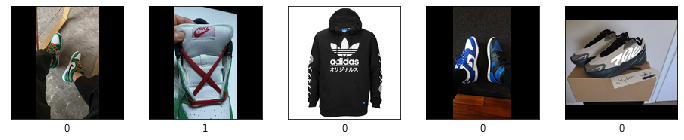

In [5]:
#check out our dataset again
plt.figure(figsize=(12,12))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(y_train[i])

In [6]:
#break to prevent accidental running of model
break

SyntaxError: 'break' outside loop (<ipython-input-6-1c8ab3b85593>, line 5)

## CNN

Now that we have our data in the appropriate format, we can run it through a model.

In [ ]:
# instantiate model
cnn = Sequential()

#1st conv layer
cnn.add(Conv2D(filters = 32, kernel_size = 3,
               activation = 'relu', input_shape = (150,150,3)))
cnn.add(MaxPooling2D(pool_size = (2,2)))

#2nd conv layer
cnn.add(Conv2D(filters = 64, kernel_size = 3,
               activation = 'relu', input_shape = (150,150,3)))
cnn.add(MaxPooling2D(pool_size = (2,2)))

#3rd conv layer
cnn.add(Conv2D(filters = 64, kernel_size = 3,
               activation = 'relu', input_shape = (150,150,3)))
cnn.add(MaxPooling2D(pool_size = (2,2)))

#flatten input before feeding into dense layer
cnn.add(Flatten())

#1st hidden layer
cnn.add(Dense(128, activation = 'relu'))
cnn.add(Dropout(0.5))

#2nd hidden layer
cnn.add(Dense(64,activation = 'relu'))
cnn.add(Dropout(0.5))

#output layer with 1 neuron for binary classification
cnn.add(Dense(1,activation = 'sigmoid'))

In [ ]:
#set up checkpoint
filepath="../weights/weights-norm/weights.{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,
                             save_best_only=True, mode='max',save_freq='epoch')
callbacks_list = [checkpoint]

In [ ]:
#compile model
cnn.compile(loss = 'binary_crossentropy',
           optimizer = 'adam',
           metrics = ['accuracy'])

In [ ]:
%%time

#train model
cnn_history = cnn.fit(X_train, y_train, 
                      validation_data = (X_val, y_val),
                      batch_size = 64,
                      epochs = 10,
                      verbose = 1,
                      callbacks=[callbacks_list]   # Pass callback to training
                     )

In [ ]:
#let's take a look at the model architecture here
cnn.summary()

#### Train and Val Loss

In [ ]:
#visualise our losses here
train_loss = cnn_history.history['loss']
val_loss = cnn_history.history['val_loss']

# Set figure size.
plt.figure(figsize=(14, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(val_loss, label='Validation Loss', color='orange')

# Set title
plt.title('Training and Validation Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Binary Crossentropy', fontsize = 18)
plt.xticks([ i for i in range(11)],
           [i for i in range(1,11)])

plt.legend(fontsize = 18);

#### Observations on Validation Loss
At approximately epoch 7, we see the validation loss starts to stagnate and increase. This is a sign of overfitting. We will reduce the batch size to improve its generalisation. 

#### Train and Val Accuracy

In [ ]:
#visualise the accuracy
train_acc = cnn_history.history['accuracy']
val_acc = cnn_history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(14, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_acc, label='Training Accuracy', color='#185fad')
plt.plot(val_acc, label='Validation Accuracy', color='orange')

# Set title
plt.title('Training and Validation Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Binary Crossentropy', fontsize = 18)
plt.xticks([ i for i in range(11)],
           [i for i in range(1,11)])

plt.legend(fontsize = 18);

## Baseline Accuracy

In [ ]:
np.mean(y_train)

The baseline accuracy can be calculated by predicting all sneakers to be replicas which is 47.3%

## Train and Test Accuracy

In [ ]:
#evaluate model on entire train set (train + val)
cnn_train_score = cnn.evaluate(X, y, verbose=1)

In [ ]:
#evaluate model on test data
cnn_test_score = cnn.evaluate(X_test, y_test, verbose=1)

cnn_labels = cnn.metrics_names

## Predictions

In [ ]:
preds = [round(x[0]) for x in cnn.predict(X_test)]
preds_proba = [x[0] for x in cnn.predict(X_test)]

preds_df = pd.DataFrame(list(zip(y_test,preds,preds_proba)), columns = ['actual','preds','preds_proba'])
preds_df.head(10)

## Confusion Matrix

In [ ]:
cm = confusion_matrix(y_test,preds)
cm_df = pd.DataFrame(cm, columns = ['pred_rep','pred_auth'],
                     index=['actual_rep','actual_auth']) 
cm_df

In [ ]:
TP, TN, FP, FN = cm[0,0], cm[1,1], cm[1,0], cm[0,1]

print(f'True Positive: {TP}')
print(f'True Negative: {TN}')
print(f'False Positive: {FP}')
print(f'False Negative: {FN}')

#### Precision

In [ ]:
#what percentage of prediction that were actually replicas
precision = TP/(TP+FP)
print(f'Precision: {precision}')

Precision measures primarily on type I errors or false positives. This means that the model classifies a sneaker as authentic post when it is actually a replica.

Our precision score is 0.77 which could cause problems by replicas as authentic sneakers. 

In order overcome this, we could potentially look at reducing the threshold. Reducing the threshold will result in less false positives but more false negative. This is preferable as false negative less damaging to the community. 

#### Recall

In [ ]:
#how many of our actual reps were correctly predicted by the model
recall = TP/(TP+FN)
print(f'Recall: {recall}')

#### Recall/Sensitivity
Recall focuses on type II errors. A type II error means that the model classifies an authentic as a replica.

Our recall score is 0.82 and this means that our model misclasses 8 out of 10 authentic sneakers as replicas. 

#### F1 Score

In [ ]:
#harmonic mean between precision and recall
f1_score = (2 * precision * recall) / (precision + recall)
f1_score

The F1 score shows the balance between precision and recall. It is calculated by 2(precision*recall)/(precision+recall).
Our high F1 score of 0.8 shows that we have a good balance of both of the above. 

Ultimately, we measure our success on the F1 score which generally works well with balanced classes, which we have at 52/48. 

In [ ]:
# Create figure.
plt.figure(figsize = (10,7))

# Create two histograms of observations.
plt.hist(preds_df[preds_df['actual'] == 0]['preds_proba'],
         bins=25,
         color='b',
         alpha = 0.6,
         label='Outcome = 0')
plt.hist(preds_df[preds_df['actual'] == 1]['preds_proba'],
         bins=25,
         color='orange',
         alpha = 0.6,
         label='Outcome = 1')

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)

# Add vertical line at P(Outcome = 1) = 0.5.
plt.vlines(x=0.5,
           ymin = 0,
           ymax = 450,
           color='r',
           linestyle = '--')

# Create legend.
plt.legend(fontsize=20);

The Receiver Operating Characteristic curve is a way to visualize the overlap between our positive class and negative class (classification threshold = 0.5).

Here we can see that there is some overlap between the 2 barcharts.
The false positives are the blue (or brown) bars to the right of the red dotted line
The false negatives are the yellow (or brown) bars to the left of the red dotted line

## ROCAUC

In [ ]:
roc_score = roc_auc_score(preds_df['actual'], preds_df['preds_proba'])
roc_score

In [ ]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    

# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(preds_df, 'actual', 'preds_proba', prob) for prob in thresholds]
fpr_values = [FPR(preds_df, 'actual', 'preds_proba', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title(f'ROC Curve with AUC = {round(roc_score,3)}', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

The more area under this blue curve is, the better separated our distributions are. Here we can see that the separation is not as ideal as we want it to be but decent enough for a first step. 

## Conclusion

Our problem statement was to be able to identify authentic vs replicas sneakers in order to combat counterfeit goods. We eventually achieved an ROCAUC score of 85% which is not the best but a good starting point.

Moving forward:
Firstly, I will be looking at a web deployment for this classifier. This will help us collate more data and improve the model.
Secondly, we can also include images of size tags, receipts and boxes which are frequently used by sneaker authenticators to identify fakes.
Lastly, there is a limitation of using images online to authenticate sneakers which is the sense of smell. Smelling the glue in sneakers is often a strong litmus test in identifying replicas.


With the above tool, we can help consumers in their decision making, by presenting them with more information. False negatives will at least drive the consumers/collectors to get a second opinion and could potentially prevent further spread of counterfeit goods. With this tool, there are potential upside and value for both the brands and the BCP. 

## Save Model

In [ ]:
model_json = cnn.to_json()
with open("../saved_models/cnn.json", "w") as json_file :
    json_file.write(model_json)

cnn.save_weights("../saved_models/model.h5")
print("Saved model to disk")

cnn.save('../saved_models/CNN.model')